In [1]:
from qiskit import *
import qiskit.aqua as qa
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

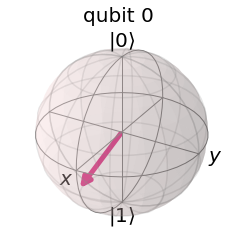

In [2]:
''' 
custom quantum state
alpha = 0.6, beta = 0.8
alpha^2 + beta^2 = 1
'''
custom_qubit_state = [0.6, 0.8]

#plot qubit on bloch sphere
plot_bloch_multivector(custom_qubit_state)

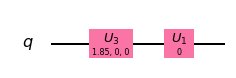

In [3]:
custom = qa.components.initial_states.Custom(num_qubits=1, state_vector=custom_qubit_state)
custom_qubit_circuit = custom.construct_circuit()

custom_qubit_circuit.draw(output='mpl')

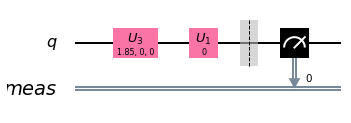

In [4]:
custom_qubit_circuit.measure_all()
custom_qubit_circuit.draw(output='mpl')

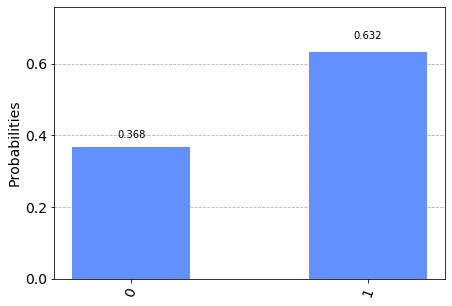

In [5]:
#measurement on local simulator
simulator = Aer.get_backend('qasm_simulator')
result = execute(custom_qubit_circuit, backend=simulator, shots=1024).result()
'''
alpha^2 ~ 0.36 
beta^2  ~ 0.64
'''
plot_histogram(result.get_counts(custom_qubit_circuit))

In [6]:
#measurement on IBMQ backend
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
provider = IBMQ.get_provider('ibm-q')
ibmq_backend = provider.get_backend('ibmq_16_melbourne')

In [ ]:
job = execute(custom_qubit_circuit, backend=ibmq_backend)

job_monitor(job)
result = job.result()
plot_histogram(result.get_counts(custom_qubit_circuit))

Job Status: job is queued (523)   